# Project 5: Identifying High Risk Areas from NYC Traffic Conditions
## *Time Series Models*

### Table of Contents:

* [Examine the Data](#examine-data)
* [Baseline Model](#model-baseline)
* [Auto SARIMA](#model-SARIMA)
* [Simple Exponential Smoothing](#model-ses)
* [Model Comparison](#model-comparison)
* [Conclusions](#conclusions)

#### Import Libraries & Read in Data

In [53]:
## standard imports 
import pandas as pd 
import numpy as np
import re
## visualizations
import matplotlib.pyplot as plt
import seaborn as sns
## preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.dummy import DummyClassifier
## modeling
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import MultinomialNB
## trees
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, AdaBoostClassifier, GradientBoostingRegressor
## NLP
from sklearn.feature_extraction.text import CountVectorizer
## analysis
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, make_scorer, f1_score, mean_squared_error, mean_absolute_error

### statsmodels
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

import pmdarima as pmd
from pmdarima.utils import tsdisplay

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.arima import AutoARIMA
from sktime.utils.plotting.forecasting import plot_ys

## options
import sklearn
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 100
pd.set_option('max_colwidth', 100)

In [28]:
### read in data
df = pd.read_csv('../data/daily_crash_counts_lincoln_tunnel.csv', index_col=0)

In [29]:
df.head()

,CRASHES
2019-01-01,5
2019-01-02,5
2019-01-03,4
2019-01-04,8
2019-01-05,1


In [30]:
df.shape

(363, 1)

## Examine the Data <a class="anchor" id="examine-data"></a>
<hr/>

Text(0.5, 1.0, 'Crashes per day 2019 - Lincoln Tunnel')

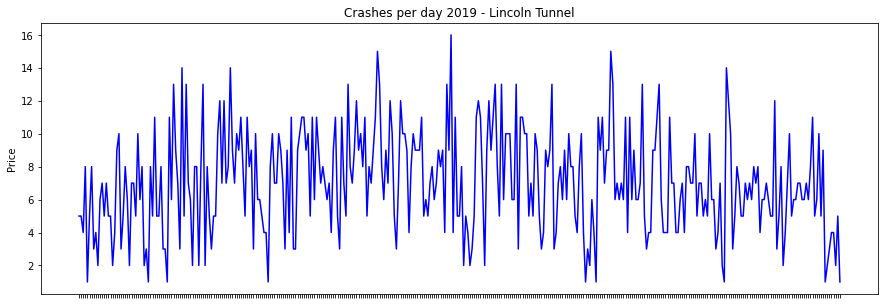

In [31]:
plt.figure(figsize=(15,5))
plt.plot(df.index, df['CRASHES'], c='blue')
# plt.plot(test.index, test['price'], c='red')
plt.tick_params(labelbottom=False)
plt.ylabel('Price')
plt.title('Crashes per day 2019 - Lincoln Tunnel')

### Select Data for Train and Test

We chose to attempt to predict the number of crashes for the month of September 2019. This was a month with enough data behind it, but also had no major holidays as there are towards the end of the year.

In [32]:
### Select data
train = df.loc['2019-01':'2019-09']
test = df.loc['2019-09':'2019-10']

In [33]:
### create dataframe for predictions for each model
df_preds = test.copy()

## Baseline Model <a class="anchor" id="model-baseline"></a>
<hr/>

For our simple baseline model we chose to just use the mean.

In [34]:
df['CRASHES'].mean()

7.0523415977961434

In [35]:
### add predictions to dataframe
df_preds['baseline'] = train['CRASHES'].mean()

### Score the baseline model

In [36]:
mae_mean = mean_absolute_error(test['CRASHES'], df_preds['baseline'])
mae_mean = np.round(mae_mean, 0)
mae_mean

3.0

In [37]:
scores = [dict(mean=mae_mean)]
scores

[{'mean': 3.0}]

## SARIMA <a class="anchor" id="model-SARIMA"></a>
<hr/>

/opt/anaconda3/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


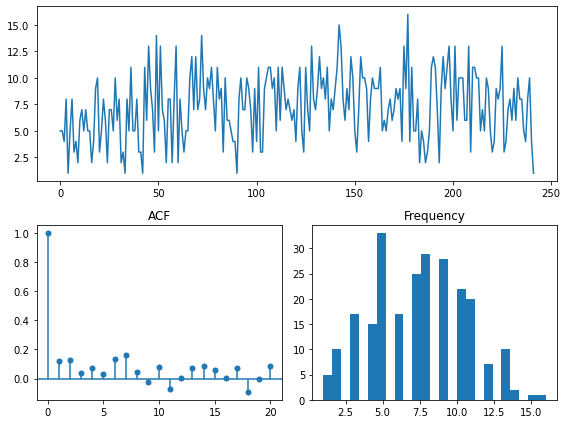

In [38]:
tsdisplay(train, lag_max=20);

In [39]:
model = pmd.auto_arima(train['CRASHES'], m=30, supress_warnings=True, trace=True)

Performing stepwise search to minimize aic


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,1)[30] intercept   : AIC=1243.159, Time=2.88 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=1374.175, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=1307.052, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=1237.191, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=1372.179, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[30] intercept   : AIC=1235.802, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[30] intercept   : AIC=1237.210, Time=0.45 sec
 ARIMA(0,1,1)(1,0,1)[30] intercept   : AIC=1239.179, Time=1.09 sec
 ARIMA(1,1,1)(0,0,0)[30] intercept   : AIC=1237.214, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[30] intercept   : AIC=1237.287, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[30] intercept   : AIC=1305.240, Time=0.04 sec


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(0,0,0)[30] intercept   : AIC=1239.476, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[30]             : AIC=1234.275, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[30]             : AIC=1235.730, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[30]             : AIC=1235.712, Time=0.25 sec
 ARIMA(0,1,1)(1,0,1)[30]             : AIC=1237.701, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0)[30]             : AIC=1235.754, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[30]             : AIC=1235.817, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[30]             : AIC=1303.247, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[30]             : AIC=1237.929, Time=0.15 sec

Best model:  ARIMA(0,1,1)(0,0,0)[30]          
Total fit time: 7.234 seconds


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  242
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -615.137
Date:                Fri, 30 Oct 2020   AIC                           1234.275
Time:                        20:12:25   BIC                           1241.244
Sample:                             0   HQIC                          1237.083
                                - 242                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9456      0.024    -39.555      0.000      -0.992      -0.899
sigma2         9.5608      1.021      9.368      0.000       7.561      11.561
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                 3.56
Prob(Q):                              0.56   Prob(JB):                         0.17
Heteroskedasticity (H):               1.04   Skew:                             0.12
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
preds = model.predict(test.shape[0])

In [42]:
df_preds['SARIMA_auto'] = preds

In [43]:
df_preds.head()

,CRASHES,baseline,SARIMA_auto
2019-09-01,3,7.334711,6.967099
2019-09-02,2,7.334711,6.967099
2019-09-03,6,7.334711,6.967099
2019-09-04,4,7.334711,6.967099
2019-09-05,1,7.334711,6.967099


### Score the SARIMA model

In [44]:
mae_sar = np.round(mean_absolute_error(test['CRASHES'], df_preds['SARIMA_auto']),2)
scores.append(dict(simple_mean=mae_sar))
scores

[{'mean': 3.0}, {'simple_mean': 2.69}]

## Simple Exponential Smoothing <a class="anchor" id="model-ses"></a>
<hr/>

In [45]:
ses = SimpleExpSmoothing(train['CRASHES']).fit(smoothing_level=0.5)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [46]:
ses.summary()

Dep. Variable:,CRASHES,No. Observations:,242
Model:,SimpleExpSmoothing,SSE,2823.535
Optimized:,True,AIC,598.547
Trend:,None,BIC,605.525
Seasonal:,None,AICC,598.716
Seasonal Periods:,None,Date:,"Fri, 30 Oct 2020"
Box-Cox:,False,Time:,20:12:25
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,4.9493258,l.0,True


In [47]:
### make predictions
ses_forecast = ses.forecast(len(test))

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [48]:
### add to results
df_preds['ses'] = ses_forecast.values

### Score the SES model

In [49]:
mae_ses = np.round(mean_absolute_error(test['CRASHES'], df_preds['ses']),2)
scores.append(dict(ses=mae_ses))

## Model Comparison <a class="anchor" id="model-comparison"></a>
<hr/>

Here we examine our three models against the actual data.

### Plot Model Results for Comparison

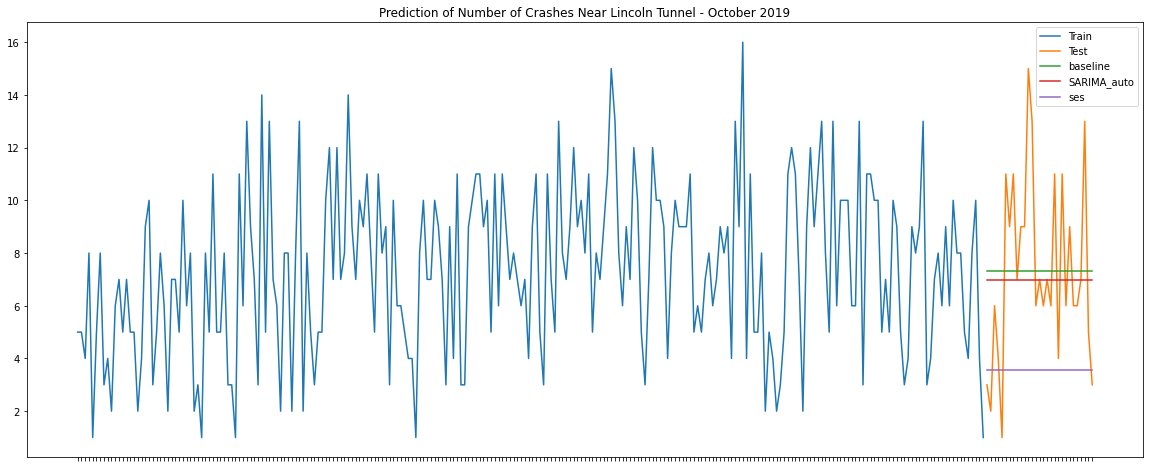

In [51]:
plt.figure(figsize=(20,8))
plt.plot(train['CRASHES'], label='Train')
plt.plot(test['CRASHES'], label='Test')
plt.plot(df_preds['baseline'], label='baseline')
plt.plot(df_preds['SARIMA_auto'], label='SARIMA_auto')
plt.plot(df_preds['ses'], label='ses')
plt.tick_params(labelbottom=False)
plt.title('Prediction of Number of Crashes Near Lincoln Tunnel - October 2019')
plt.legend(loc='best')
plt.savefig('../images/model-results.png',bbox_inches='tight');

### Model Scoring with MAE

Below are the results for our 3 models.

In [52]:
scores

[{'mean': 3.0}, {'simple_mean': 2.69}, {'ses': 4.13}]

## Conclusions <a class="anchor" id="conclusions"></a>
<hr/> 

As we can see, none of our models performed particularly well. Some things we observed.
* There is a diurnal pattern to when crashes occur. Most occur in late afternoon.
* Most crashes involve cars going straight forward and are caused by inattentive drivers.
* Time-series models were able to predict the average number of crashes going forward, but was not able capture the complexity of the data.

#### Future Work
* Include additional factors in the model with better chance of capturing complexity.
* Create a spatio-temporal showing risk of vehicular crashes in New York City


